# Supplementary Figure 1: Correlation Matrix

# libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

linestyles = ['solid', 'dotted', 'dashed','dashdot']  
colors = ['b','r','k','#FFFF00','g','#808080','#56B4E9','#FF7F00']
markers = ['.','+','s']
sns.set_palette(colors)

%run _helper.ipynb

# parameters

In [7]:
input_path = ''
output_path = ''

# data

In [8]:
data = pd.read_csv(input_path)
header = list(data)[1:-1]

In [9]:
# get full column names
dicc_features = get_full_variable_names(header)

# switch to new column names
data = data.rename(mapper=dicc_features, axis=1)
cols = list(data)[1:-1]

# correlation matrix

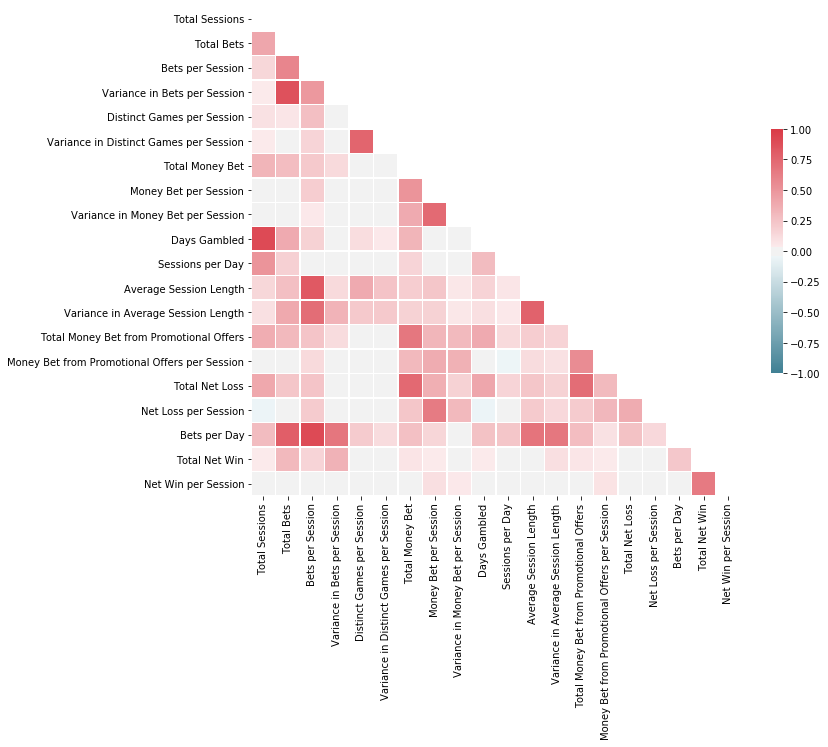

In [10]:
# compute correlation matrix
corr = data[cols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# save fig
plt.savefig(output_path + 'correlation_matrix.png',bbox_inches="tight")

plt.show()
